In [1]:
cd C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)

C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)


In [2]:
import os

directories = os.listdir()

filename = []
label = []

for i in range(0, len(directories)):
  os.chdir(directories[i])
  print(os.getcwd())
  files = os.listdir()
  for j in range(0, len(files)):
    files[j] = directories[i] + "/" + files[j]
    label.append(directories[i])
    print(files[j])
  filename = filename + files
  os.chdir("..")
print(filename)
print(label)

C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)\A
A/A1.jpg
A/A10.jpg
A/A11.jpg
A/A12.jpg
A/A13.jpg
A/A14.jpg
A/A15.jpg
A/A16.jpg
A/A17.jpg
A/A18.jpg
A/A19.jpg
A/A2.jpg
A/A20.jpg
A/A21.jpg
A/A22.jpg
A/A23.jpg
A/A24.jpg
A/A25.jpg
A/A26.jpg
A/A27.jpg
A/A28.jpg
A/A29.jpg
A/A3.jpg
A/A30.jpg
A/A31.jpg
A/A32.jpg
A/A33.jpg
A/A34.jpg
A/A35.jpg
A/A36.jpg
A/A37.jpg
A/A38.jpg
A/A39.jpg
A/A4.jpg
A/A40.jpg
A/A41.jpg
A/A42.jpg
A/A43.jpg
A/A44.jpg
A/A45.jpg
A/A46.jpg
A/A47.jpg
A/A48.jpg
A/A49.jpg
A/A5.jpg
A/A50.jpg
A/A51.jpg
A/A52.jpg
A/A53.jpg
A/A54.jpg
A/A55.jpg
A/A6.jpg
A/A7.jpg
A/A8.jpg
A/A9.jpg
C:\Users\USER\Downloads\PROJECT\DATASET_adaptive_mean_thresholding(3)\B
B/B1.jpg
B/B10.jpg
B/B11.jpg
B/B12.jpg
B/B13.jpg
B/B14.jpg
B/B15.jpg
B/B16.jpg
B/B17.jpg
B/B18.jpg
B/B19.jpg
B/B2.jpg
B/B20.jpg
B/B21.jpg
B/B22.jpg
B/B23.jpg
B/B24.jpg
B/B25.jpg
B/B26.jpg
B/B27.jpg
B/B28.jpg
B/B29.jpg
B/B3.jpg
B/B30.jpg
B/B31.jpg
B/B32.jpg
B/B33.jpg
B/B34.jpg
B/B35.jpg
B/B36.jpg
B/B37.jpg
B/B38.jp

In [3]:
print(len(filename))

1430


In [4]:
import pandas as pd

data = {"filename": filename,
        "label": label}

df = pd.DataFrame(data = data)

In [5]:
print(df)

       filename label
0      A/A1.jpg     A
1     A/A10.jpg     A
2     A/A11.jpg     A
3     A/A12.jpg     A
4     A/A13.jpg     A
...         ...   ...
1425  Z/Z55.jpg     Z
1426   Z/Z6.jpg     Z
1427   Z/Z7.jpg     Z
1428   Z/Z8.jpg     Z
1429   Z/Z9.jpg     Z

[1430 rows x 2 columns]


In [6]:
#random image list
df_shuffled = df.sample(frac = 1)
print(df_shuffled)

       filename label
1322  Y/Y11.jpg     Y
45    A/A50.jpg     A
743   N/N35.jpg     N
1159  V/V13.jpg     V
949   R/R22.jpg     R
...         ...   ...
464   I/I31.jpg     I
291   F/F24.jpg     F
1114  U/U22.jpg     U
159   C/C54.jpg     C
193   D/D35.jpg     D

[1430 rows x 2 columns]


In [7]:
#cross validation

from sklearn.model_selection import KFold

train_data = df_shuffled

y = train_data[['label']]

# angka split nya 5
kf = KFold(n_splits = 5)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [8]:
#preprocessing data train dan data testing

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
#define penyimpanan dataset

image_dir = '/Users/USER/Downloads/PROJECT/DATASET_adaptive_mean_thresholding(3)'

In [10]:
#menyimpan model CNN terbaik

def get_model_name(k):
  return 'model_'+str(k)+'.h5'

In [11]:
#define akurasi

import time
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

VALIDATION_ACCURACY = []
VALIDATION_PRECISION = []
VALIDATION_RECALL = []
VALIDATION_F1SCORE = []

CV = []

LOSS = []
ACCURACY = []

VAL_LOSS = []
VAL_ACCURACY = []

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from pandas.core.algorithms import mode
import tensorflow
# from keras.backend import conv2d
# from warnings import filters
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
# from PIL import Image
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "1"
#BUILD AND TRAIN CNN MODEL

save_dir = '/saved_models_64_150_fix/'
fold_var = 1

#looping for each cross validation
for train_index, val_index in kf.split(np.zeros(len(y)),y):
    training_data = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]
    
    train_data_generator = train_datagen.flow_from_dataframe(training_data, directory = image_dir, 
                                                             x_col = "filename", y_col = "label", 
                                                             target_size=(64, 64), batch_size=10, color_mode="grayscale", 
                                                             class_mode = "categorical", shuffle = True)
    valid_data_generator = test_datagen.flow_from_dataframe(validation_data, directory = image_dir, 
                                                            x_col = "filename", y_col = "label", 
                                                            target_size=(64, 64), batch_size=10, color_mode="grayscale", 
                                                            class_mode = "categorical", shuffle = False)
    

    model = Sequential()
    
    #layer convolution 1
#     model.add(Conv2D(filters=32, kernel_size=3))
#     model.add(Activation("relu"))
#     model.add(Conv2D(filters=32, kernel_size=3))
#     model.add(Activation("relu"))
#     model.add(MaxPool2D(pool_size=2, strides=1))
    
    model.add(Conv2D(filters=64, kernel_size=3, input_shape=[64, 64, 1]))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=64, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 2
    model.add(Conv2D(filters=128, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=128, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 3
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=256, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 4
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    #layer convolution 5
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=512, kernel_size=3))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=2, strides=1))
    
    model.add(Flatten())
    
    #fully connected layer
    model.add(Dense(units=256))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(units=64))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
#     model.add(Dense(units=32, activation='relu'))
#     model.add(Dropout(0.40))
#     model.add(Dense(units=64))
#     model.add(Activation("relu"))
#     model.add(Dropout(0.5))
    model.add(Dense(units=26))
    model.add(Activation('softmax'))
    
    model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    checkpoint = ModelCheckpoint(save_dir+get_model_name(fold_var), 
                                 monitor = 'val_accuracy', verbose = 1, 
                                 save_best_only = True, mode='max')
    
    callback_list = [checkpoint]
    model.summary()
    
    hist = model.fit(train_data_generator, epochs = 150, callbacks = callback_list, validation_data = valid_data_generator)

    model.load_weights("/saved_models_64_150_fix/model_"+str(fold_var)+".h5")

    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names, results))

    y_predict = model.predict(valid_data_generator)

    #get the label of validation data
    y = np.asarray(valid_data_generator.labels)

    #karena output multilabel adalah nilai 0 - 1 dari tiap class maka diambil yang terbesar
    y_predict_labels = np.argmax(y_predict, axis=1)

    acc = accuracy_score(y_predict_labels, y)
    prec = precision_score(y_predict_labels, y, average = 'weighted')
    rec = recall_score(y_predict_labels, y, average = 'weighted')
    f1score = f1_score(y_predict_labels, y, average = 'weighted')

    print("\n")
    print("Cross Validation: ", fold_var)
    print("Accuracy: ", results['accuracy'])
    print("Precision: ", prec)
    print("Recall: ", rec)
    print("f1 score: ", f1score)
    print("\n")

    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_PRECISION.append(prec)
    VALIDATION_RECALL.append(rec)
    VALIDATION_F1SCORE.append(f1score)

    LOSS.append(hist.history['loss'])
    ACCURACY.append(hist.history['accuracy'])

    VAL_LOSS.append(hist.history['val_loss'])
    VAL_ACCURACY.append(hist.history['val_accuracy'])

    CV.append("CV" +str(fold_var))

    #     clear_session()

    fold_var += 1

Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 activation (Activation)     (None, 62, 62, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 64)       0         
 )                                                               
                                                                 

115/115 [==============================] - ETA: 0s - loss: 2.3128 - accuracy: 0.2753
Epoch 34: val_accuracy did not improve from 0.32517
115/115 [==============================] - 871s 8s/step - loss: 2.3128 - accuracy: 0.2753 - val_loss: 9.9043 - val_accuracy: 0.0699
Epoch 35/150
115/115 [==============================] - ETA: 0s - loss: 2.2983 - accuracy: 0.2806
Epoch 35: val_accuracy did not improve from 0.32517
115/115 [==============================] - 869s 8s/step - loss: 2.2983 - accuracy: 0.2806 - val_loss: 5.2111 - val_accuracy: 0.1154
Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 2.2875 - accuracy: 0.2771
Epoch 36: val_accuracy did not improve from 0.32517
115/115 [==============================] - 868s 8s/step - loss: 2.2875 - accuracy: 0.2771 - val_loss: 2.9379 - val_accuracy: 0.1224
Epoch 37/150
115/115 [==============================] - ETA: 0s - loss: 2.2404 - accuracy: 0.2937
Epoch 37: val_accuracy did not improve from 0.32517
115/115 [========

Epoch 63/150
115/115 [==============================] - ETA: 0s - loss: 2.1447 - accuracy: 0.3444
Epoch 63: val_accuracy did not improve from 0.39161
115/115 [==============================] - 872s 8s/step - loss: 2.1447 - accuracy: 0.3444 - val_loss: 3.7979 - val_accuracy: 0.1119
Epoch 64/150
115/115 [==============================] - ETA: 0s - loss: 2.1582 - accuracy: 0.3103
Epoch 64: val_accuracy did not improve from 0.39161
115/115 [==============================] - 872s 8s/step - loss: 2.1582 - accuracy: 0.3103 - val_loss: 12.7090 - val_accuracy: 0.0874
Epoch 65/150
115/115 [==============================] - ETA: 0s - loss: 2.1898 - accuracy: 0.3260
Epoch 65: val_accuracy did not improve from 0.39161
115/115 [==============================] - 873s 8s/step - loss: 2.1898 - accuracy: 0.3260 - val_loss: 4.0287 - val_accuracy: 0.0874
Epoch 66/150
115/115 [==============================] - ETA: 0s - loss: 2.1529 - accuracy: 0.3488
Epoch 66: val_accuracy did not improve from 0.39161
115

Epoch 92/150
115/115 [==============================] - ETA: 0s - loss: 2.1008 - accuracy: 0.3418
Epoch 92: val_accuracy did not improve from 0.39860
115/115 [==============================] - 878s 8s/step - loss: 2.1008 - accuracy: 0.3418 - val_loss: 26.8749 - val_accuracy: 0.0804
Epoch 93/150
115/115 [==============================] - ETA: 0s - loss: 2.1331 - accuracy: 0.3217
Epoch 93: val_accuracy did not improve from 0.39860
115/115 [==============================] - 877s 8s/step - loss: 2.1331 - accuracy: 0.3217 - val_loss: 10.8971 - val_accuracy: 0.0944
Epoch 94/150
115/115 [==============================] - ETA: 0s - loss: 2.1253 - accuracy: 0.3278
Epoch 94: val_accuracy did not improve from 0.39860
115/115 [==============================] - 874s 8s/step - loss: 2.1253 - accuracy: 0.3278 - val_loss: 4.3709 - val_accuracy: 0.1329
Epoch 95/150
115/115 [==============================] - ETA: 0s - loss: 2.1118 - accuracy: 0.3304
Epoch 95: val_accuracy did not improve from 0.39860
11

115/115 [==============================] - 978s 9s/step - loss: 3.6752 - accuracy: 0.0385 - val_loss: nan - val_accuracy: 0.0245
Epoch 121/150
115/115 [==============================] - ETA: 0s - loss: 3.5556 - accuracy: 0.0323
Epoch 121: val_accuracy did not improve from 0.45105
115/115 [==============================] - 960s 8s/step - loss: 3.5556 - accuracy: 0.0323 - val_loss: nan - val_accuracy: 0.0245
Epoch 122/150
115/115 [==============================] - ETA: 0s - loss: 3.4614 - accuracy: 0.0507
Epoch 122: val_accuracy did not improve from 0.45105
115/115 [==============================] - 927s 8s/step - loss: 3.4614 - accuracy: 0.0507 - val_loss: nan - val_accuracy: 0.0245
Epoch 123/150
115/115 [==============================] - ETA: 0s - loss: 3.4458 - accuracy: 0.0428
Epoch 123: val_accuracy did not improve from 0.45105
115/115 [==============================] - 922s 8s/step - loss: 3.4458 - accuracy: 0.0428 - val_loss: nan - val_accuracy: 0.0245
Epoch 124/150
115/115 [=====

Epoch 150/150
115/115 [==============================] - ETA: 0s - loss: 3.2775 - accuracy: 0.0323
Epoch 150: val_accuracy did not improve from 0.45105
29/29 [==============================] - 49s 2s/step


Cross Validation:  1
Accuracy:  0.45104894042015076
Precision:  0.5815527866484262
Recall:  0.45104895104895104
f1 score:  0.46122309414597246


Found 1144 validated image filenames belonging to 26 classes.
Found 286 validated image filenames belonging to 26 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 62, 62, 64)        640       
                                                                 
 activation_16 (Activation)  (None, 62, 62, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 64)        36928     
                                         

115/115 [==============================] - 929s 8s/step - loss: 3.0674 - accuracy: 0.1364 - val_loss: 6330.8340 - val_accuracy: 0.1294
Epoch 5/150
115/115 [==============================] - ETA: 0s - loss: 2.9773 - accuracy: 0.1626
Epoch 5: val_accuracy did not improve from 0.12937
115/115 [==============================] - 924s 8s/step - loss: 2.9773 - accuracy: 0.1626 - val_loss: 27.6853 - val_accuracy: 0.0315
Epoch 6/150
115/115 [==============================] - ETA: 0s - loss: 2.9074 - accuracy: 0.1503
Epoch 6: val_accuracy did not improve from 0.12937
115/115 [==============================] - 1216s 11s/step - loss: 2.9074 - accuracy: 0.1503 - val_loss: 6.9382 - val_accuracy: 0.0490
Epoch 7/150
115/115 [==============================] - ETA: 0s - loss: 2.7744 - accuracy: 0.1538 
Epoch 7: val_accuracy did not improve from 0.12937
115/115 [==============================] - 1280s 11s/step - loss: 2.7744 - accuracy: 0.1538 - val_loss: 13.4076 - val_accuracy: 0.0699
Epoch 8/150
115/11

Epoch 33/150
115/115 [==============================] - ETA: 0s - loss: 2.2322 - accuracy: 0.3077
Epoch 33: val_accuracy did not improve from 0.39161
115/115 [==============================] - 917s 8s/step - loss: 2.2322 - accuracy: 0.3077 - val_loss: 4.2187 - val_accuracy: 0.1084
Epoch 34/150
115/115 [==============================] - ETA: 0s - loss: 2.3070 - accuracy: 0.2736
Epoch 34: val_accuracy did not improve from 0.39161
115/115 [==============================] - 918s 8s/step - loss: 2.3070 - accuracy: 0.2736 - val_loss: 8.3067 - val_accuracy: 0.0664
Epoch 35/150
115/115 [==============================] - ETA: 0s - loss: 2.3008 - accuracy: 0.2815
Epoch 35: val_accuracy did not improve from 0.39161
115/115 [==============================] - 917s 8s/step - loss: 2.3008 - accuracy: 0.2815 - val_loss: 2.0984 - val_accuracy: 0.3147
Epoch 36/150
115/115 [==============================] - ETA: 0s - loss: 2.2008 - accuracy: 0.3051
Epoch 36: val_accuracy did not improve from 0.39161
115/

115/115 [==============================] - 940s 8s/step - loss: 2.1396 - accuracy: 0.3121 - val_loss: 7.2346 - val_accuracy: 0.0804
Epoch 62/150
115/115 [==============================] - ETA: 0s - loss: 2.2134 - accuracy: 0.2990
Epoch 62: val_accuracy did not improve from 0.45455
115/115 [==============================] - 939s 8s/step - loss: 2.2134 - accuracy: 0.2990 - val_loss: 8.5792 - val_accuracy: 0.0979
Epoch 63/150
115/115 [==============================] - ETA: 0s - loss: 2.1527 - accuracy: 0.3374
Epoch 63: val_accuracy did not improve from 0.45455
115/115 [==============================] - 938s 8s/step - loss: 2.1527 - accuracy: 0.3374 - val_loss: 3.3864 - val_accuracy: 0.2098
Epoch 64/150
115/115 [==============================] - ETA: 0s - loss: 2.1837 - accuracy: 0.3260
Epoch 64: val_accuracy did not improve from 0.45455
115/115 [==============================] - 938s 8s/step - loss: 2.1837 - accuracy: 0.3260 - val_loss: 1.7866 - val_accuracy: 0.3601
Epoch 65/150
115/115 [

115/115 [==============================] - 911s 8s/step - loss: 3.4988 - accuracy: 0.0446 - val_loss: nan - val_accuracy: 0.0350
Epoch 91/150
115/115 [==============================] - ETA: 0s - loss: 3.4380 - accuracy: 0.0402
Epoch 91: val_accuracy did not improve from 0.46503
115/115 [==============================] - 911s 8s/step - loss: 3.4380 - accuracy: 0.0402 - val_loss: nan - val_accuracy: 0.0350
Epoch 92/150
115/115 [==============================] - ETA: 0s - loss: 3.3084 - accuracy: 0.0594
Epoch 92: val_accuracy did not improve from 0.46503
115/115 [==============================] - 917s 8s/step - loss: 3.3084 - accuracy: 0.0594 - val_loss: nan - val_accuracy: 0.0350
Epoch 93/150
115/115 [==============================] - ETA: 0s - loss: 2.2938 - accuracy: 0.2972
Epoch 93: val_accuracy did not improve from 0.46503
115/115 [==============================] - 921s 8s/step - loss: 2.2938 - accuracy: 0.2972 - val_loss: nan - val_accuracy: 0.0350
Epoch 94/150
115/115 [============

Epoch 120/150
115/115 [==============================] - ETA: 0s - loss: 3.2710 - accuracy: 0.0385
Epoch 120: val_accuracy did not improve from 0.46503
115/115 [==============================] - 905s 8s/step - loss: 3.2710 - accuracy: 0.0385 - val_loss: nan - val_accuracy: 0.0350
Epoch 121/150
115/115 [==============================] - ETA: 0s - loss: 3.2646 - accuracy: 0.0507
Epoch 121: val_accuracy did not improve from 0.46503
115/115 [==============================] - 903s 8s/step - loss: 3.2646 - accuracy: 0.0507 - val_loss: nan - val_accuracy: 0.0350
Epoch 122/150
115/115 [==============================] - ETA: 0s - loss: 3.2672 - accuracy: 0.0437
Epoch 122: val_accuracy did not improve from 0.46503
115/115 [==============================] - 905s 8s/step - loss: 3.2672 - accuracy: 0.0437 - val_loss: nan - val_accuracy: 0.0350
Epoch 123/150
115/115 [==============================] - ETA: 0s - loss: 3.2686 - accuracy: 0.0402
Epoch 123: val_accuracy did not improve from 0.46503
115/1

115/115 [==============================] - 944s 8s/step - loss: 3.2438 - accuracy: 0.1241 - val_loss: 4.8335 - val_accuracy: 0.1014
Epoch 4/150
115/115 [==============================] - ETA: 0s - loss: 2.9608 - accuracy: 0.1582
Epoch 4: val_accuracy did not improve from 0.10140
115/115 [==============================] - 941s 8s/step - loss: 2.9608 - accuracy: 0.1582 - val_loss: 5.6868 - val_accuracy: 0.0280
Epoch 5/150
115/115 [==============================] - ETA: 0s - loss: 2.9416 - accuracy: 0.1556
Epoch 5: val_accuracy did not improve from 0.10140
115/115 [==============================] - 941s 8s/step - loss: 2.9416 - accuracy: 0.1556 - val_loss: 31.4504 - val_accuracy: 0.0140
Epoch 6/150
115/115 [==============================] - ETA: 0s - loss: 2.8664 - accuracy: 0.1600
Epoch 6: val_accuracy improved from 0.10140 to 0.15734, saving model to /saved_models_64_150_fix\model_3.h5
115/115 [==============================] - 945s 8s/step - loss: 2.8664 - accuracy: 0.1600 - val_loss: 

Epoch 61/150
115/115 [==============================] - ETA: 0s - loss: 2.1635 - accuracy: 0.3129
Epoch 61: val_accuracy did not improve from 0.37762
115/115 [==============================] - 923s 8s/step - loss: 2.1635 - accuracy: 0.3129 - val_loss: 2.5407 - val_accuracy: 0.2657
Epoch 62/150
115/115 [==============================] - ETA: 0s - loss: 2.1016 - accuracy: 0.3418
Epoch 62: val_accuracy did not improve from 0.37762
115/115 [==============================] - 919s 8s/step - loss: 2.1016 - accuracy: 0.3418 - val_loss: 3.1166 - val_accuracy: 0.1503
Epoch 63/150
115/115 [==============================] - ETA: 0s - loss: 2.1473 - accuracy: 0.3182
Epoch 63: val_accuracy did not improve from 0.37762
115/115 [==============================] - 921s 8s/step - loss: 2.1473 - accuracy: 0.3182 - val_loss: 2.7360 - val_accuracy: 0.3042
Epoch 64/150
115/115 [==============================] - ETA: 0s - loss: 2.1390 - accuracy: 0.3173
Epoch 64: val_accuracy did not improve from 0.37762
115/

Epoch 90/150
115/115 [==============================] - ETA: 0s - loss: 2.0605 - accuracy: 0.3357
Epoch 90: val_accuracy did not improve from 0.37762
115/115 [==============================] - 931s 8s/step - loss: 2.0605 - accuracy: 0.3357 - val_loss: 5.8956 - val_accuracy: 0.0734
Epoch 91/150
115/115 [==============================] - ETA: 0s - loss: 2.0161 - accuracy: 0.3566
Epoch 91: val_accuracy did not improve from 0.37762
115/115 [==============================] - 933s 8s/step - loss: 2.0161 - accuracy: 0.3566 - val_loss: 8.4576 - val_accuracy: 0.0280
Epoch 92/150
115/115 [==============================] - ETA: 0s - loss: 2.0832 - accuracy: 0.3566
Epoch 92: val_accuracy improved from 0.37762 to 0.40559, saving model to /saved_models_64_150_fix\model_3.h5
115/115 [==============================] - 938s 8s/step - loss: 2.0832 - accuracy: 0.3566 - val_loss: 1.8342 - val_accuracy: 0.4056
Epoch 93/150
115/115 [==============================] - ETA: 0s - loss: 2.0095 - accuracy: 0.3628

Epoch 147/150
115/115 [==============================] - ETA: 0s - loss: 1.8166 - accuracy: 0.4126
Epoch 147: val_accuracy did not improve from 0.53846
115/115 [==============================] - 883s 8s/step - loss: 1.8166 - accuracy: 0.4126 - val_loss: 3.5507 - val_accuracy: 0.1958
Epoch 148/150
115/115 [==============================] - ETA: 0s - loss: 1.7463 - accuracy: 0.4301
Epoch 148: val_accuracy did not improve from 0.53846
115/115 [==============================] - 883s 8s/step - loss: 1.7463 - accuracy: 0.4301 - val_loss: 2.7508 - val_accuracy: 0.2413
Epoch 149/150
115/115 [==============================] - ETA: 0s - loss: 1.8358 - accuracy: 0.4117
Epoch 149: val_accuracy did not improve from 0.53846
115/115 [==============================] - 884s 8s/step - loss: 1.8358 - accuracy: 0.4117 - val_loss: 15.7697 - val_accuracy: 0.0490
Epoch 150/150
115/115 [==============================] - ETA: 0s - loss: 1.8060 - accuracy: 0.4170
Epoch 150: val_accuracy did not improve from 0.5

Epoch 2/150
115/115 [==============================] - ETA: 0s - loss: 3.4744 - accuracy: 0.0935
Epoch 2: val_accuracy did not improve from 0.03497
115/115 [==============================] - 898s 8s/step - loss: 3.4744 - accuracy: 0.0935 - val_loss: 20.5274 - val_accuracy: 0.0350
Epoch 3/150
115/115 [==============================] - ETA: 0s - loss: 3.1176 - accuracy: 0.1259
Epoch 3: val_accuracy improved from 0.03497 to 0.04895, saving model to /saved_models_64_150_fix\model_4.h5
115/115 [==============================] - 900s 8s/step - loss: 3.1176 - accuracy: 0.1259 - val_loss: 5.8354 - val_accuracy: 0.0490
Epoch 4/150
115/115 [==============================] - ETA: 0s - loss: 2.9792 - accuracy: 0.1469
Epoch 4: val_accuracy did not improve from 0.04895
115/115 [==============================] - 897s 8s/step - loss: 2.9792 - accuracy: 0.1469 - val_loss: 9.0859 - val_accuracy: 0.0350
Epoch 5/150
115/115 [==============================] - ETA: 0s - loss: 2.8953 - accuracy: 0.1705
Epoch

Epoch 59/150
115/115 [==============================] - ETA: 0s - loss: 2.1846 - accuracy: 0.3129
Epoch 59: val_accuracy did not improve from 0.44056
115/115 [==============================] - 891s 8s/step - loss: 2.1846 - accuracy: 0.3129 - val_loss: 2.0002 - val_accuracy: 0.3986
Epoch 60/150
115/115 [==============================] - ETA: 0s - loss: 2.1444 - accuracy: 0.3252
Epoch 60: val_accuracy did not improve from 0.44056
115/115 [==============================] - 892s 8s/step - loss: 2.1444 - accuracy: 0.3252 - val_loss: 2.0267 - val_accuracy: 0.3951
Epoch 61/150
115/115 [==============================] - ETA: 0s - loss: 2.1517 - accuracy: 0.3173
Epoch 61: val_accuracy did not improve from 0.44056
115/115 [==============================] - 893s 8s/step - loss: 2.1517 - accuracy: 0.3173 - val_loss: 2.2500 - val_accuracy: 0.2902
Epoch 62/150
115/115 [==============================] - ETA: 0s - loss: 2.1955 - accuracy: 0.3243
Epoch 62: val_accuracy did not improve from 0.44056
115/

115/115 [==============================] - ETA: 0s - loss: 3.3794 - accuracy: 0.0524
Epoch 115: val_accuracy did not improve from 0.53846
115/115 [==============================] - 879s 8s/step - loss: 3.3794 - accuracy: 0.0524 - val_loss: nan - val_accuracy: 0.0280
Epoch 116/150
115/115 [==============================] - ETA: 0s - loss: 2.6438 - accuracy: 0.2142
Epoch 116: val_accuracy did not improve from 0.53846
115/115 [==============================] - 887s 8s/step - loss: 2.6438 - accuracy: 0.2142 - val_loss: nan - val_accuracy: 0.0280
Epoch 117/150
115/115 [==============================] - ETA: 0s - loss: 3.3792 - accuracy: 0.0455
Epoch 117: val_accuracy did not improve from 0.53846
115/115 [==============================] - 885s 8s/step - loss: 3.3792 - accuracy: 0.0455 - val_loss: nan - val_accuracy: 0.0280
Epoch 118/150
115/115 [==============================] - ETA: 0s - loss: 3.3842 - accuracy: 0.0376
Epoch 118: val_accuracy did not improve from 0.53846
115/115 [==========

                                                                 
 dense_14 (Dense)            (None, 26)                1690      
                                                                 
 activation_79 (Activation)  (None, 26)                0         
                                                                 
Total params: 157,470,618
Trainable params: 157,469,978
Non-trainable params: 640
_________________________________________________________________
Epoch 1/150
115/115 [==============================] - ETA: 0s - loss: 3.9842 - accuracy: 0.0551
Epoch 1: val_accuracy improved from -inf to 0.04196, saving model to /saved_models_64_150_fix\model_5.h5
115/115 [==============================] - 928s 8s/step - loss: 3.9842 - accuracy: 0.0551 - val_loss: 9225.3779 - val_accuracy: 0.0420
Epoch 2/150
115/115 [==============================] - ETA: 0s - loss: 3.4399 - accuracy: 0.1154
Epoch 2: val_accuracy improved from 0.04196 to 0.05594, saving model to /saved_models_64

Epoch 27/150
115/115 [==============================] - ETA: 0s - loss: 2.2662 - accuracy: 0.2955
Epoch 27: val_accuracy did not improve from 0.33916
115/115 [==============================] - 892s 8s/step - loss: 2.2662 - accuracy: 0.2955 - val_loss: 3.7165 - val_accuracy: 0.1503
Epoch 28/150
115/115 [==============================] - ETA: 0s - loss: 2.2934 - accuracy: 0.2841
Epoch 28: val_accuracy did not improve from 0.33916
115/115 [==============================] - 891s 8s/step - loss: 2.2934 - accuracy: 0.2841 - val_loss: 2.5714 - val_accuracy: 0.2483
Epoch 29/150
115/115 [==============================] - ETA: 0s - loss: 2.3112 - accuracy: 0.2902
Epoch 29: val_accuracy did not improve from 0.33916
115/115 [==============================] - 889s 8s/step - loss: 2.3112 - accuracy: 0.2902 - val_loss: 11.3331 - val_accuracy: 0.0664
Epoch 30/150
115/115 [==============================] - ETA: 0s - loss: 2.2942 - accuracy: 0.2753
Epoch 30: val_accuracy did not improve from 0.33916
115

115/115 [==============================] - 900s 8s/step - loss: 2.2039 - accuracy: 0.2832 - val_loss: 2.5523 - val_accuracy: 0.2657
Epoch 56/150
115/115 [==============================] - ETA: 0s - loss: 2.1768 - accuracy: 0.3007
Epoch 56: val_accuracy did not improve from 0.48252
115/115 [==============================] - 902s 8s/step - loss: 2.1768 - accuracy: 0.3007 - val_loss: 2.0081 - val_accuracy: 0.3636
Epoch 57/150
115/115 [==============================] - ETA: 0s - loss: 2.1901 - accuracy: 0.3112
Epoch 57: val_accuracy did not improve from 0.48252
115/115 [==============================] - 898s 8s/step - loss: 2.1901 - accuracy: 0.3112 - val_loss: 2.3815 - val_accuracy: 0.2902
Epoch 58/150
115/115 [==============================] - ETA: 0s - loss: 2.2098 - accuracy: 0.3147
Epoch 58: val_accuracy did not improve from 0.48252
115/115 [==============================] - 898s 8s/step - loss: 2.2098 - accuracy: 0.3147 - val_loss: 2.0733 - val_accuracy: 0.3462
Epoch 59/150
115/115 [

Epoch 85/150
115/115 [==============================] - ETA: 0s - loss: 2.1690 - accuracy: 0.3226
Epoch 85: val_accuracy did not improve from 0.48252
115/115 [==============================] - 919s 8s/step - loss: 2.1690 - accuracy: 0.3226 - val_loss: 13.9670 - val_accuracy: 0.0420
Epoch 86/150
115/115 [==============================] - ETA: 0s - loss: 2.0711 - accuracy: 0.3427
Epoch 86: val_accuracy did not improve from 0.48252
115/115 [==============================] - 922s 8s/step - loss: 2.0711 - accuracy: 0.3427 - val_loss: 7.7071 - val_accuracy: 0.1154
Epoch 87/150
115/115 [==============================] - ETA: 0s - loss: 2.1760 - accuracy: 0.3112
Epoch 87: val_accuracy did not improve from 0.48252
115/115 [==============================] - 925s 8s/step - loss: 2.1760 - accuracy: 0.3112 - val_loss: 2.8129 - val_accuracy: 0.1888
Epoch 88/150
115/115 [==============================] - ETA: 0s - loss: 2.1476 - accuracy: 0.3365
Epoch 88: val_accuracy did not improve from 0.48252
115

115/115 [==============================] - ETA: 0s - loss: 3.2932 - accuracy: 0.0367
Epoch 114: val_accuracy did not improve from 0.48252
115/115 [==============================] - 904s 8s/step - loss: 3.2932 - accuracy: 0.0367 - val_loss: nan - val_accuracy: 0.0559
Epoch 115/150
115/115 [==============================] - ETA: 0s - loss: 3.3211 - accuracy: 0.0455
Epoch 115: val_accuracy did not improve from 0.48252
115/115 [==============================] - 902s 8s/step - loss: 3.3211 - accuracy: 0.0455 - val_loss: nan - val_accuracy: 0.0559
Epoch 116/150
115/115 [==============================] - ETA: 0s - loss: 3.3065 - accuracy: 0.0385
Epoch 116: val_accuracy did not improve from 0.48252
115/115 [==============================] - 902s 8s/step - loss: 3.3065 - accuracy: 0.0385 - val_loss: nan - val_accuracy: 0.0559
Epoch 117/150
115/115 [==============================] - ETA: 0s - loss: 3.2936 - accuracy: 0.0516
Epoch 117: val_accuracy did not improve from 0.48252
115/115 [==========

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


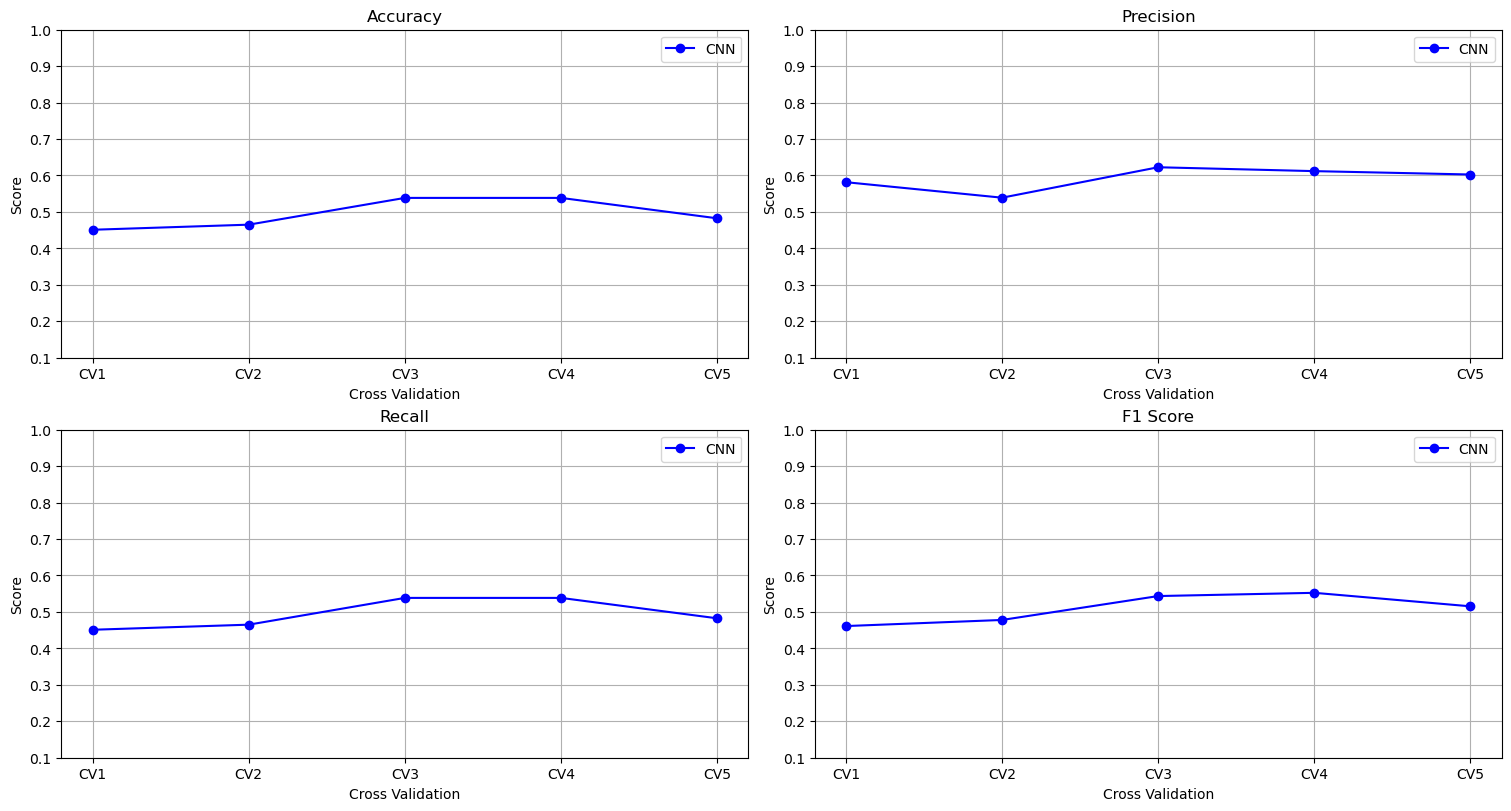

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,constrained_layout=True, figsize=(15,8))

axs[0,0].plot(CV, VALIDATION_ACCURACY, color='blue', marker='o', label = "CNN")
axs[0,0].set_title('Accuracy')
axs[0,0].set_xlabel('Cross Validation')
axs[0,0].set_ylabel('Score')
axs[0,0].set_ylim((0.1, 1))
axs[0,0].grid()
axs[0,0].legend()

axs[0,1].plot(CV, VALIDATION_PRECISION, color='blue', marker='o', label = "CNN")
axs[0,1].set_title('Precision')
axs[0,1].set_xlabel('Cross Validation')
axs[0,1].set_ylabel('Score')
axs[0,1].set_ylim((0.1, 1))
axs[0,1].grid()
axs[0,1].legend()

axs[1,0].plot(CV, VALIDATION_RECALL, color='blue', marker='o', label = "CNN")
axs[1,0].set_title('Recall')
axs[1,0].set_xlabel('Cross Validation')
axs[1,0].set_ylabel('Score')
axs[1,0].set_ylim((0.1, 1))
axs[1,0].grid()
axs[1,0].legend()

axs[1,1].plot(CV, VALIDATION_F1SCORE, color='blue', marker='o', label = "CNN")
axs[1,1].set_title('F1 Score')
axs[1,1].set_xlabel('Cross Validation')
axs[1,1].set_ylabel('Score')
axs[1,1].set_ylim((0.1, 1))
axs[1,1].grid()
axs[1,1].legend()

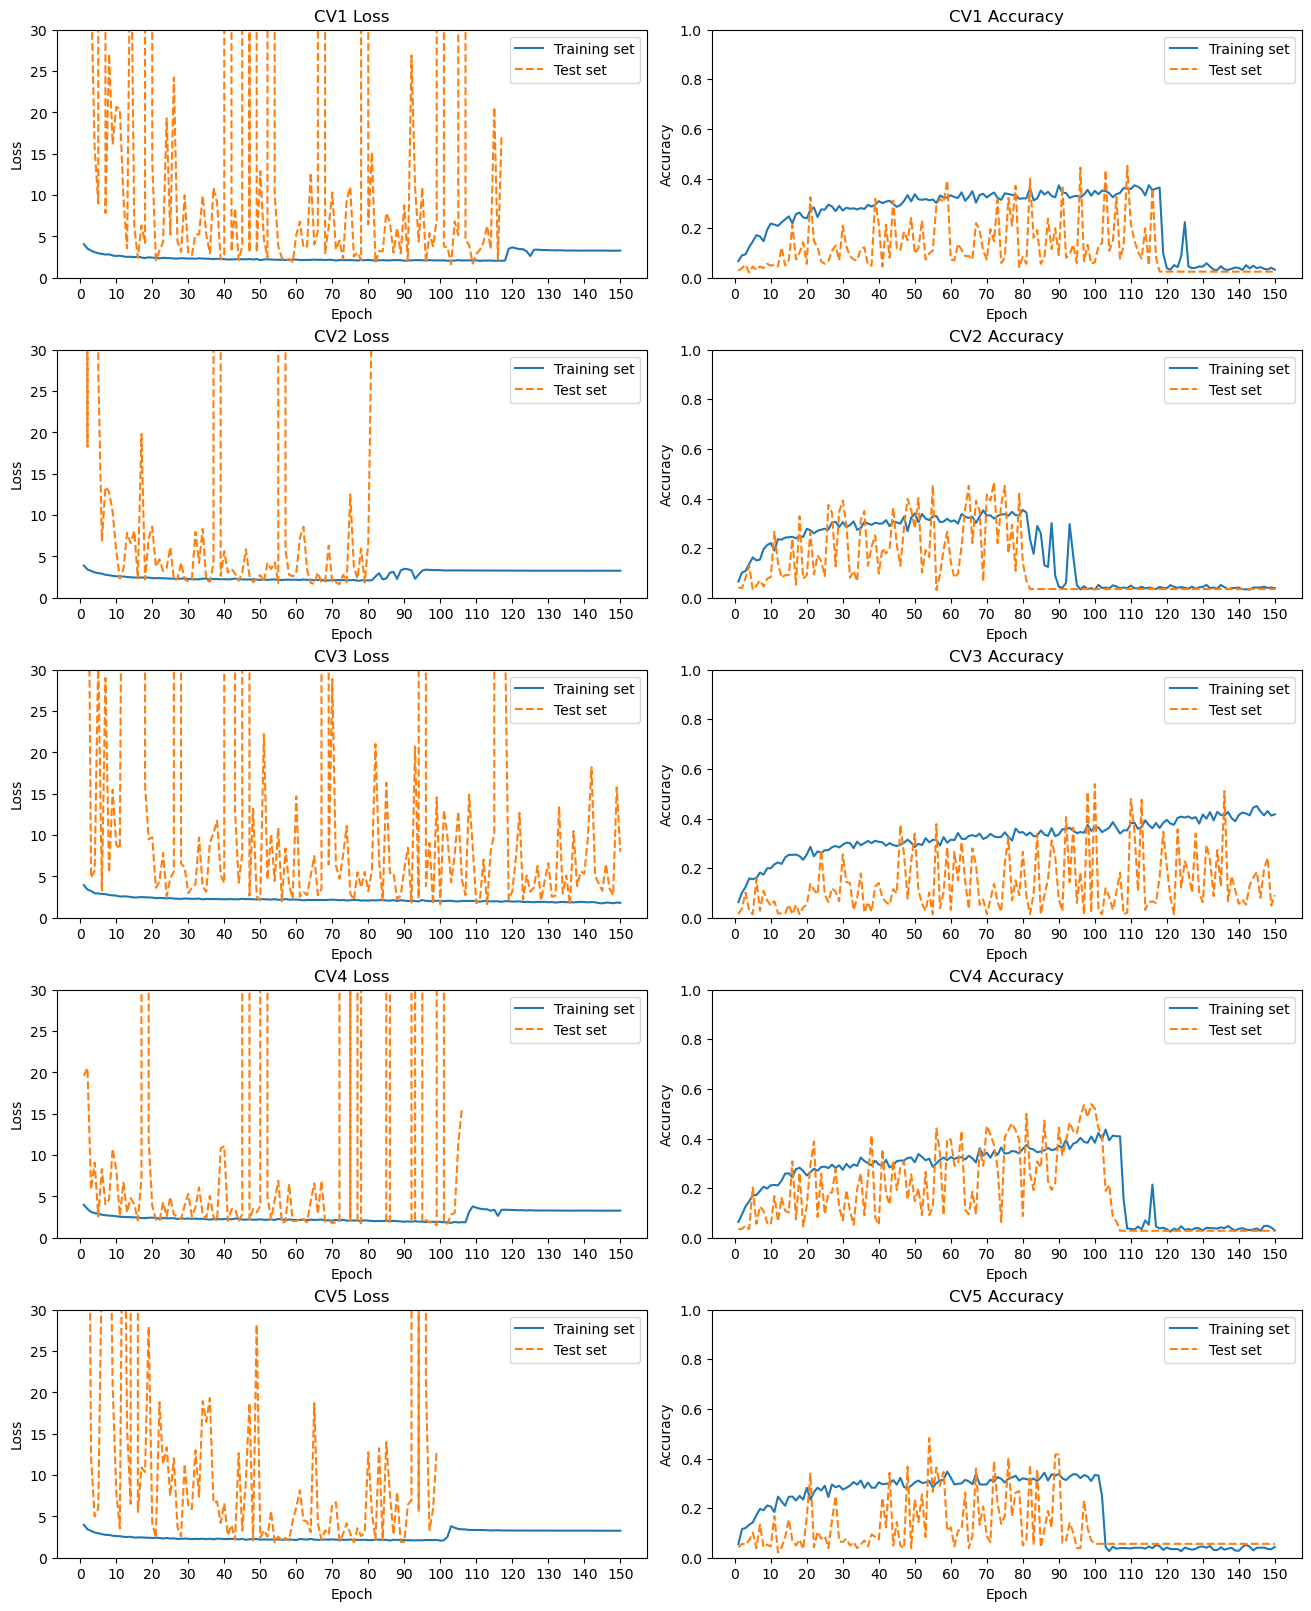

In [16]:
import matplotlib.pyplot as plt

n_epochs = 150
#set the x axis start from 1
x_axis = np.arange(1,151)

fig, ax = plt.subplots(5,2,constrained_layout=True, figsize=(13,16))

for i in range(5):
    for j in range(2):
        if(j==0):
            ax[i,j].set_title('CV' +str(i+1) + ' Loss')
            ax[i,j].set_ylabel('Loss')
            ax[i,j].plot(x_axis, LOSS[i], label='Training set')
            ax[i,j].plot(x_axis, VAL_LOSS[i], label='Test set', linestyle='--')
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylim((0, 30))
            ax[i,j].set_xticks(np.arange(0, 151, 10))
            ax[i,j].legend()
        else:
            ax[i,j].set_title('CV' +str(i+1) + ' Accuracy')
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylabel('Accuracy')
            ax[i,j].plot(x_axis, ACCURACY[i], label='Training set')
            ax[i,j].plot(x_axis, VAL_ACCURACY[i], label='Test set', linestyle='--')    
            ax[i,j].set_xlabel('Epoch')
            ax[i,j].set_ylim((0, 1))
            ax[i,j].set_xticks(np.arange(0, 151, 10))
            ax[i,j].legend()

In [17]:
for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    filter, bias = layer.get_weights()
    print(layer.name, filter.shape)

conv2d_52 (3, 3, 1, 64)
conv2d_53 (3, 3, 64, 64)
conv2d_54 (3, 3, 64, 128)
conv2d_55 (3, 3, 128, 128)
conv2d_56 (3, 3, 128, 256)
conv2d_57 (3, 3, 256, 256)
conv2d_58 (3, 3, 256, 256)
conv2d_59 (3, 3, 256, 512)
conv2d_60 (3, 3, 512, 512)
conv2d_61 (3, 3, 512, 512)
conv2d_62 (3, 3, 512, 512)
conv2d_63 (3, 3, 512, 512)
conv2d_64 (3, 3, 512, 512)


In [18]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i, layer.name, layer.output.shape)

0 conv2d_52 (None, 62, 62, 64)
2 conv2d_53 (None, 60, 60, 64)
5 conv2d_54 (None, 57, 57, 128)
7 conv2d_55 (None, 55, 55, 128)
10 conv2d_56 (None, 52, 52, 256)
12 conv2d_57 (None, 50, 50, 256)
14 conv2d_58 (None, 48, 48, 256)
17 conv2d_59 (None, 45, 45, 512)
19 conv2d_60 (None, 43, 43, 512)
21 conv2d_61 (None, 41, 41, 512)
24 conv2d_62 (None, 38, 38, 512)
26 conv2d_63 (None, 36, 36, 512)
28 conv2d_64 (None, 34, 34, 512)


In [19]:
from tensorflow.keras.models import Model
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

1/1 [==============================] - 0s 122ms/step


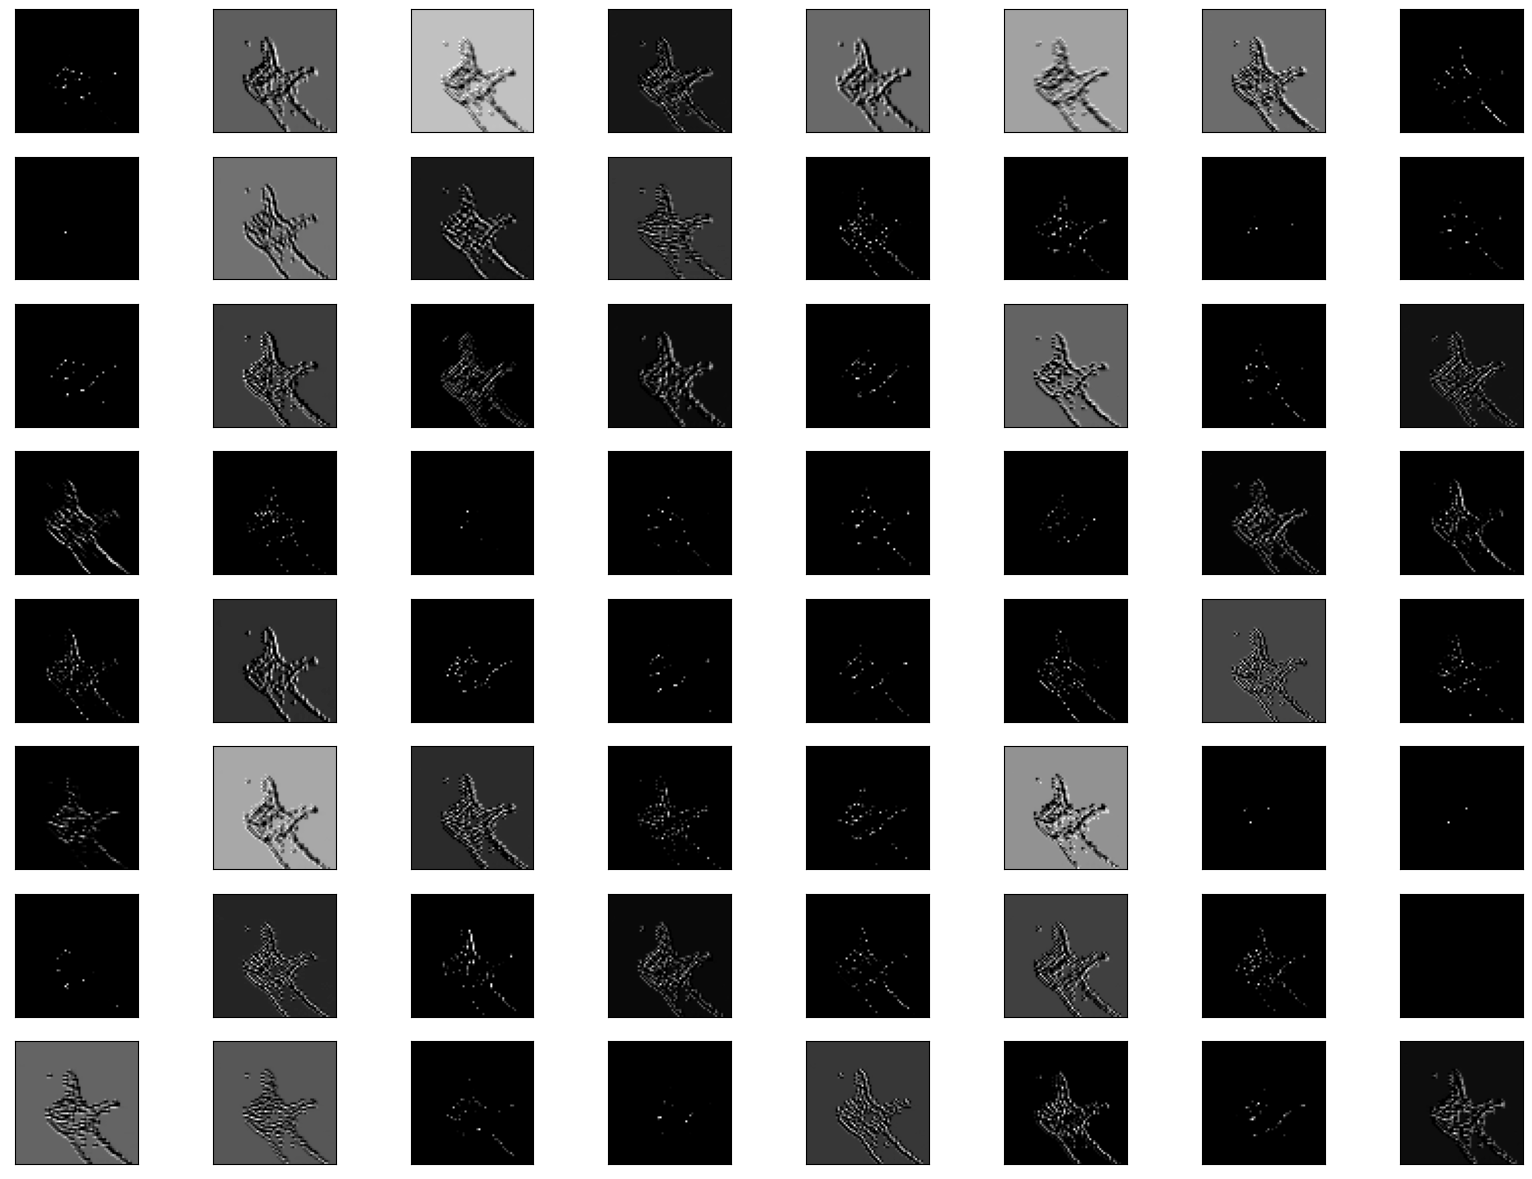

In [20]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

image = load_img("L36.jpg", target_size=(64,64), color_mode="grayscale")

image = img_to_array(image)
image = np.expand_dims(image, axis=0)

features = model.predict(image)

fig = plt.figure(figsize=(20,15))
for i in range(1, features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(features[0,:,:,i-1], cmap='gray')
plt.show()

(1, 64, 64, 1)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 62, 62, 64)        640       
                                                                 
 activation_32 (Activation)  (None, 62, 62, 64)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 activation_33 (Activation)  (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 59, 59, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 57, 57, 128)       73856     
                                       

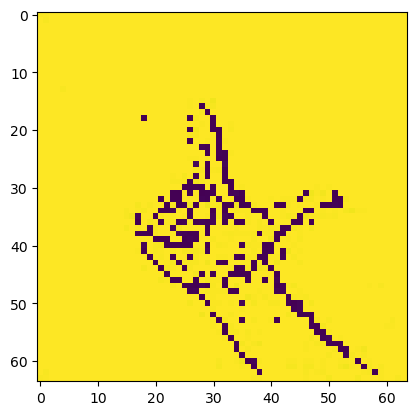

In [21]:
# img = load_img("A30.jpg", target_size=(64,64), color_mode="grayscale")

from tensorflow.keras.preprocessing.image import load_img, img_to_array 
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

#Prediction of single image
import numpy as np

img = load_img("L36.jpg", target_size=(64,64), color_mode="grayscale")
image = img_to_array(img)
images = image/255
test_image = np.expand_dims(images, axis = 0)
# image_data = preprocess_input(test_image)
print(test_image.shape)

model = load_model('model_3.h5')
model.summary()
result = model.predict(test_image)
plt.imshow(img)
#training_set.class_indices
# print('Predicted Sign is:')
# print('')
img = np.argmax(model.predict(test_image), axis=1)
print('Prediction:',img)
if img == 0:
    print('A')
elif img == 1:
    print('B')
elif img == 2:
    print('C')
elif img == 3:
    print('D')
elif img == 4:
    print('E')
elif img == 5:
    print('F')
elif img == 6:
    print('G')
elif img == 7:
    print('H')
elif img == 8:
    print('I')
elif img == 9:
    print('J')
elif img == 10:
    print('K')
elif img == 11:
    print('L')
elif img == 12:
    print('M')
elif img == 13:
    print('N')
elif img == 14:
    print('O')
elif img == 15:
    print('P')
elif img == 16:
    print('Q')
elif img == 17:
    print('R')
elif img == 18:
    print('S')
elif img == 19:
    print('T')
elif img == 20:
    print('U')
elif img == 21:
    print('V')
elif img == 22:
    print('W')
elif img == 23:
    print('X')
elif img == 24:
    print('Y')
elif img == 25:
    print('Z')

In [22]:
train_data_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [27]:
import tensorflow as tf
visual_model = tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [28]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.
